In [47]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib as plt
    
import pandas as pd


# Load the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data', header=None)


In [26]:
# Specify the name of the columns
df.columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# Show the header and the first five rows
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [27]:
# Specify the name of the columns that should be removed
columns_remove = ['ID', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# Remove the columns above (in columns_remove)
df = df.drop(['ID', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Ketamine', 'Legalh', 'Heroin', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA','Escore', 'SS', 'Impulsive', 'Education','Age','Gender','Ethnicity'], axis=1)

In [28]:
#Check the new data frame
df.head()

,Country,Nscore,Oscore,Ascore,Cscore,LSD
0,0.96082,0.31287,-0.58331,-0.91699,-0.00665,CL0
1,0.96082,-0.67825,1.43533,0.76096,-0.14277,CL2
2,0.96082,-0.46725,-0.84732,-1.62090,-1.01450,CL0
3,0.96082,-0.14882,-0.01928,0.59042,0.58489,CL0
4,0.96082,0.73545,-0.45174,-0.30172,1.30612,CL0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4C15D5320>],
      dtype=object)

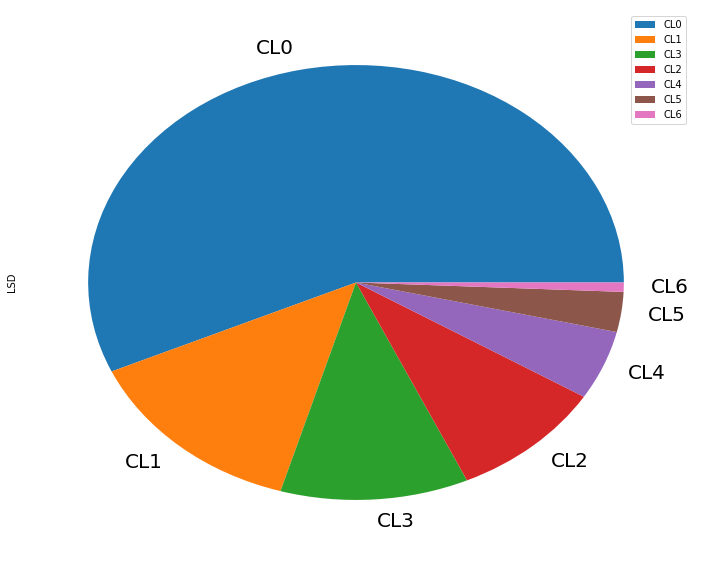

In [29]:
#Get Unique Meth User values,output to a dataframe and plot it
LSD_dist = df.LSD.unique()
LSD_Users = df['LSD'].value_counts()
LSD_df = pd.DataFrame(LSD_Users)

explode = (0, 0.05, 0, 0)
LSD_df.plot.pie(subplots=True,fontsize=20,figsize=(12, 10))


In [30]:
df.LSD.replace(to_replace=dict(CL0='NonUser', CL1= 'NonUser', CL2= 'NonUser', CL3= 'User', CL4 = 'User', CL5= 'User', CL6= 'User' ), inplace=True)



df.head()

,Country,Nscore,Oscore,Ascore,Cscore,LSD
0,0.96082,0.31287,-0.58331,-0.91699,-0.00665,NonUser
1,0.96082,-0.67825,1.43533,0.76096,-0.14277,NonUser
2,0.96082,-0.46725,-0.84732,-1.62090,-1.01450,NonUser
3,0.96082,-0.14882,-0.01928,0.59042,0.58489,NonUser
4,0.96082,0.73545,-0.45174,-0.30172,1.30612,NonUser


## REMOVE ROWS WITH MISSING VALUES AND CHECK FOR THE SHAPE BEFORE AND AFTER

In [31]:
import numpy as np

print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))

# Replace ? with np.NaN
df.replace('?', np.NaN, inplace=True)

# Remove rows with np.NaN
df.dropna(how='any', inplace=True)

print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))

Number of rows before removing rows with missing values: 1885
Number of rows after removing rows with missing values: 1885


In [32]:
# Get the feature vector
X = df.drop("LSD", axis=1).values

# Get the target vector
y = df["LSD"].values

In [33]:
# Specify the name of the target
target = 'LSD'

# Get the target vector
y = df[target]
# Specify the name of the features
features = list(df.drop(target, axis=1).columns)

# Get the feature vector
X = df[features]

In [34]:
#ONE HOT ENCODING 
X = pd.get_dummies(X)

# Show the encoded features
X.head()

,Country,Nscore,Oscore,Ascore,Cscore
0,0.96082,0.31287,-0.58331,-0.91699,-0.00665
1,0.96082,-0.67825,1.43533,0.76096,-0.14277
2,0.96082,-0.46725,-0.84732,-1.62090,-1.01450
3,0.96082,-0.14882,-0.01928,0.59042,0.58489
4,0.96082,0.73545,-0.45174,-0.30172,1.30612


In [35]:
from sklearn.preprocessing import LabelEncoder

# Declare the LabelEncoder
le = LabelEncoder()

print('The unique value in y before encoding: ' + (', ').join([str(val) for val in np.unique(y)]))

# Encode the target
# Implement me
y = le.fit_transform(y)
print('The unique value in y after encoding: ' + (', ').join([str(val) for val in np.unique(y)]))

The unique value in y before encoding: NonUser, User
The unique value in y after encoding: 0, 1


In [36]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (set random_state as 0 and stratify as y)
# Implement me
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [37]:
from sklearn.preprocessing import StandardScaler

# Declare the StandardScaler
std_scaler = StandardScaler()

# Standardize the features in the training data
X_train = std_scaler.fit_transform(X_train)

# Standardize the features in testing data
X_test = std_scaler.transform(X_test)

In [38]:
from sklearn.metrics import precision_recall_fscore_support

def train_test_evaluate(classifier):
    """
    Train, test, and evaluate the classifier
    :param classifier: a classifier             
    """
    
    # Declare the model
    clf = classifier(random_state=0)
    
    # Train the model
    clf.fit(X_train, y_train)
    
    if classifier is DecisionTreeClassifier:
        global tree  
        # Get the tree
        tree = clf
    elif classifier is RandomForestClassifier:
        global importances
        # Get the feature importances
        importances = clf.feature_importances_
    
    # Update the list of accuracies
    accuracies.append(clf.score(X_test, y_test))

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# The list of classifiers
clfs = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier]

# The tree
tree = None

# The list of importances
importances = []

# The list of accuracies
accuracies = []

# For each classifer
for classifier in clfs:
    # Call function train_test_evaluate (defined above)
    train_test_evaluate(classifier)
    
print(importances)

print(accuracies)

[0.21188539 0.18991959 0.21079041 0.18439775 0.20300687]
[0.7897526501766784, 0.7703180212014135, 0.773851590106007]


In [40]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['0', 
                                        '1'],
                           feature_names=X.columns,
                           out_file=None) 

graph = graph_from_dot_data(dot_data) 

img = Image(graph.create_png())
img

InvocationException: GraphViz's executables not found

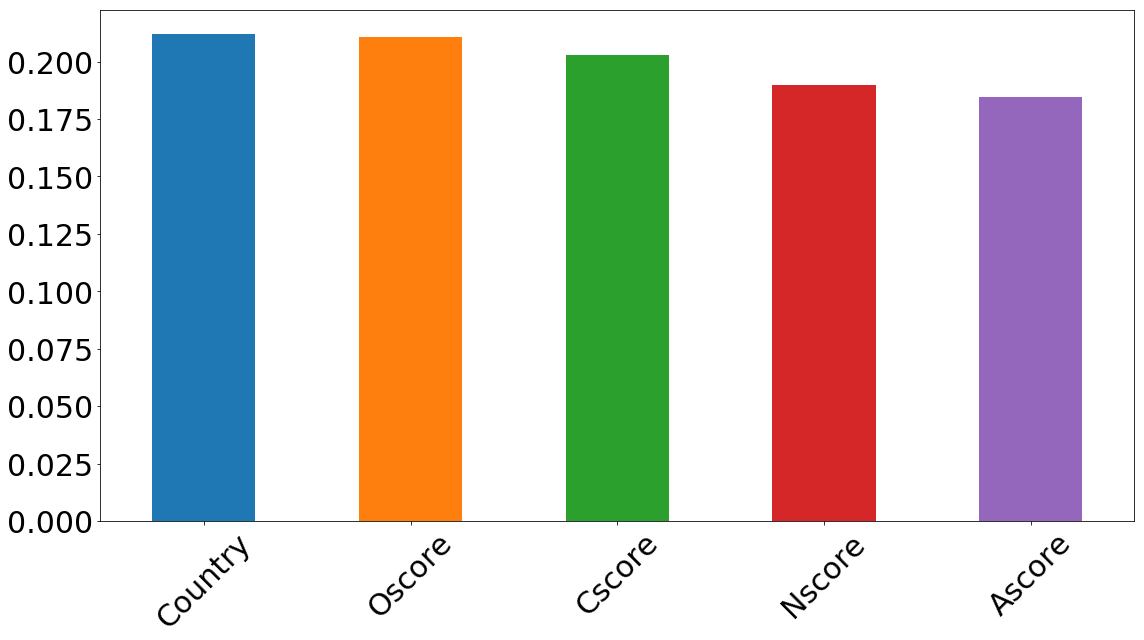

In [60]:
import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

# Discussion
The graph above shows the importance of the 12 features in descending order

Ascore (Agreeableness)
Oscore (Openness to experience)
Nscore (Neuroticism)
Cscore (Conscientiousness)
Escore (Extraversion)
SS (Sensation Seeking)

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Delcare the model
rf = RandomForestClassifier(random_state=0, class_weight='balanced')

# Train the model
# Implement me
rf.fit(X_train, y_train)


# Print the classification accuracy
print('The accuracy of random forest is: ' + str(rf.score(X_test, y_test)))

The accuracy of random forest is: 0.7950530035335689


In [62]:
from sklearn.linear_model import LogisticRegression

# Delcare the model
lr = LogisticRegression(random_state=0, class_weight='balanced')

# Train the model
# Implement me 
lr.fit(X_train, y_train)

# Print the classification accuracy
print('The accuracy of logistic regression is: ' + str(lr.score(X_test, y_test)))

The accuracy of logistic regression is: 0.7332155477031802


In [ ]:
#Random Forest had a higher accuracy at .74 compared to .63 for Logistic Regression

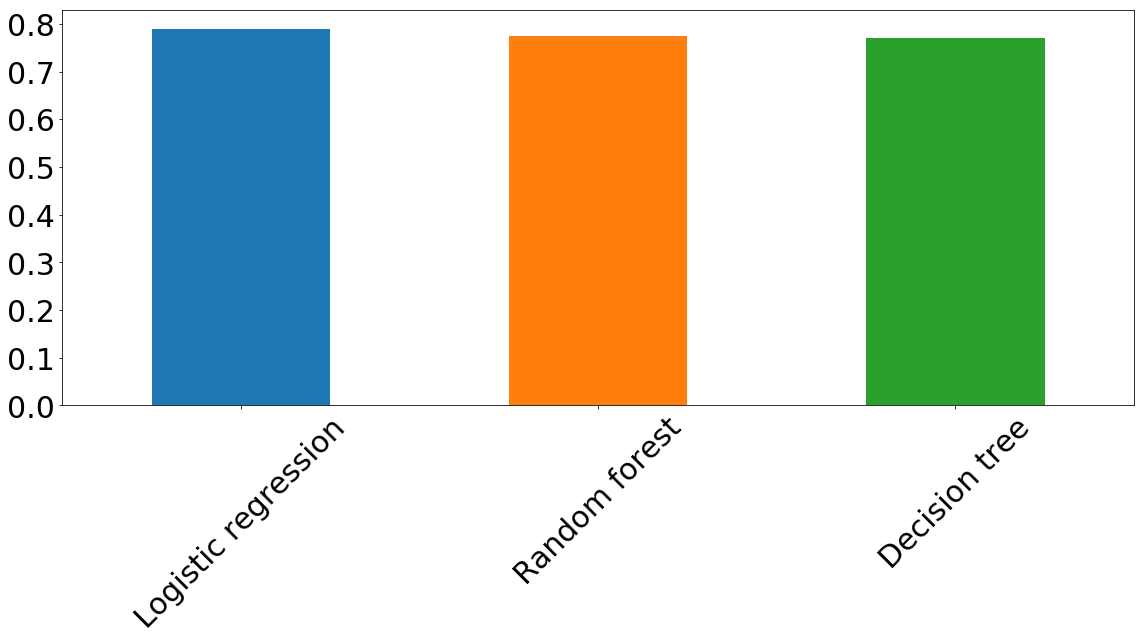

In [63]:
# Convert the accuracies into one-dimensional 1darray with corresponding classifier names as axis labels
clf_accuracies = pd.Series(accuracies, ['Logistic regression', 'Decision tree', 'Random forest'])

# Sort the array in descending order of the accuracies
clf_accuracies = clf_accuracies.sort_values(ascending=False)

# Draw the bar Plot from clf_accuracies 
clf_accuracies.plot(x='Classifiers', y='Fscores', kind='bar', figsize=(16,9), rot=45, fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Delcare the model
lr = LogisticRegression(random_state=0, class_weight='balanced')

# Train the model
# Implement me
lr.fit(X_train, y_train)

# Print the classification accuracy
print('The accuracy of logistic regression is: ' + str(lr.score(X_test, y_test)))

In [49]:
def get_distribution(clf, X, y, feature, class_):
    """
    Calculate the probability distribution of a class based on a feature
    :param clf: the logistic regression classifier
    :param X: the feature vector
    :param y: the target vector
    :param feature: a feature
    :param class_: a class label of the target
    :return: the probability distribution, which is a dictionary 
             where the key is the value of the feature and value the probability:
             distribution = {val_1: proba_1, val_2: proba_2, ..., val_n: proba_n}
             
    """
    
    # Get the column number of the feature
    col = features.index(feature)
    
    # Get the encoded number of the class_
    num = le.transform([class_])
    
    # Get X_sparse
    # Here, all the columns are zeros except for column col, where X_sparse[:, col] = X[:, col]
    X_sparse = np.zeros((X.shape[0], X.shape[1]))
    X_sparse[:, col] = X[:, col]
    
    # Get the unique value and the corresponding index in column col
    vals, idxs = np.unique(X_sparse[:, col], return_index=True)
    
    # Get the distribution
    distribution = {}
    # For each unique index
    for idx in idxs:
        # Get the corresponding value
        val = X_sparse[idx, col]
        
        # Get the probability of each class
        probas = clf.predict_proba(X_sparse[idx, :].reshape(1, -1)).ravel()

        # Get the probability of the class
        proba = probas[num]
        
        distribution[val] = proba
        
    return distribution

def plot_distribution(distribution, feature, class_):
    """
    Plot the probability distribution of a class based on the feature
    :param distribution: the probability distribution, which is a dictionary 
                         where the key is the value of the feature and value the probability:
                         distribution = {val_1: proba_1, val_2: proba_2, ..., val_n: proba_n}
    :param feature: a feature
    :param class_: a class label of the target
    """
    
    # Get the probabilities
    probas = [distribution[val] for val in sorted(distribution.keys())]
    
    # Get the dataframe
    probas_df = pd.DataFrame(probas)
    
    # Get the values
    vals = sorted(distribution.keys())
    
    # Round down to 2 decimals
    vals = [round(val, 2) for val in vals]

    # Plot the bar chart
    probas_df.plot(kind='bar', figsize=(25, 10), fontsize=30, color='purple', legend=False)
    plt.xticks(range(len(vals)), vals)
    plt.xlabel('Feature value', fontsize=30)
    plt.ylabel('Probability', fontsize=30)
    plt.title('P(' + class_ + ' | ' + feature + ')', fontsize=30, loc='center')
    plt.tight_layout()
    plt.show()

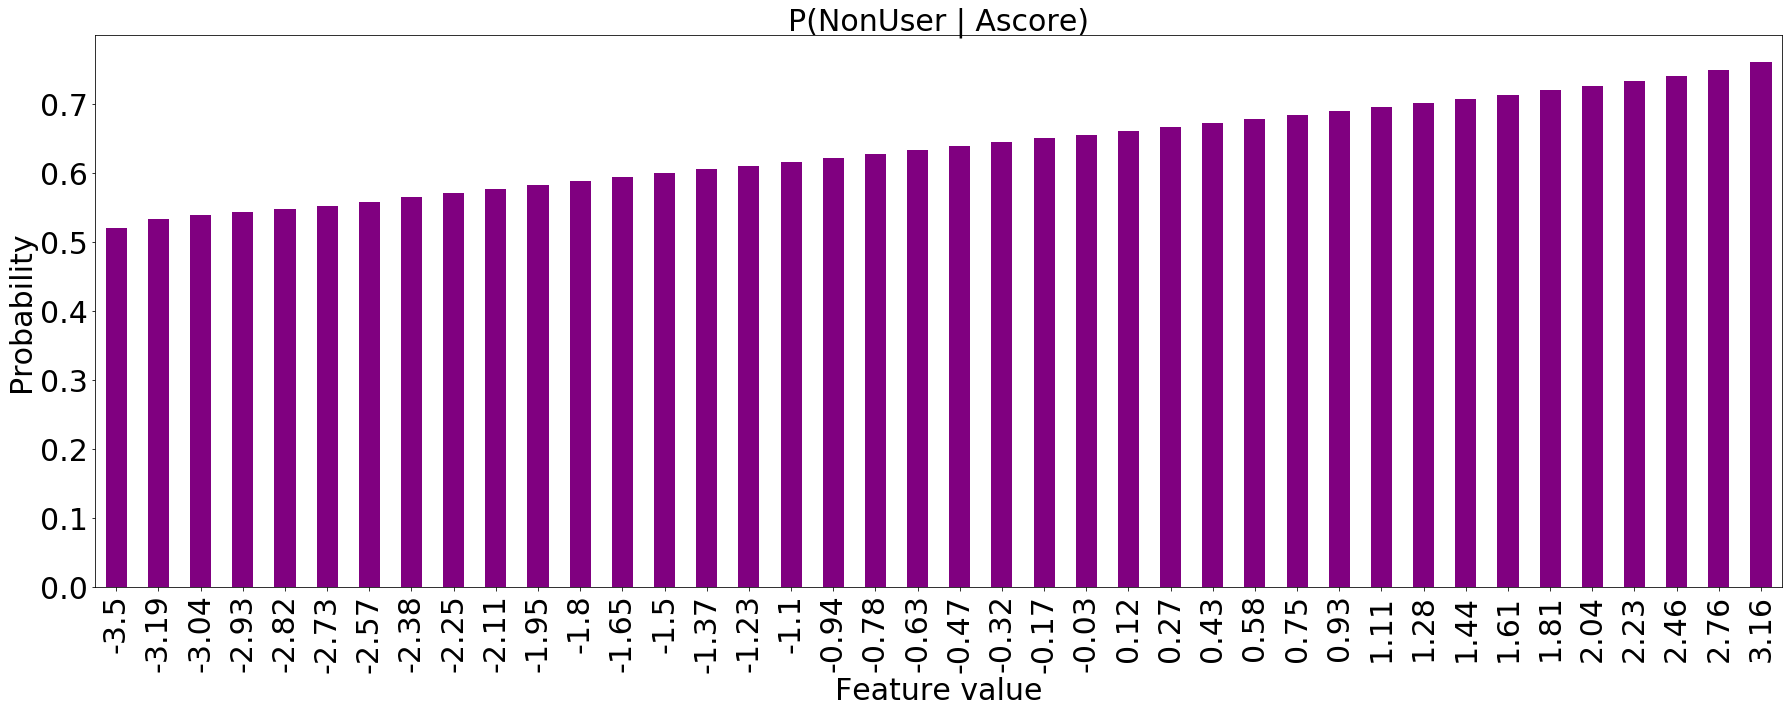

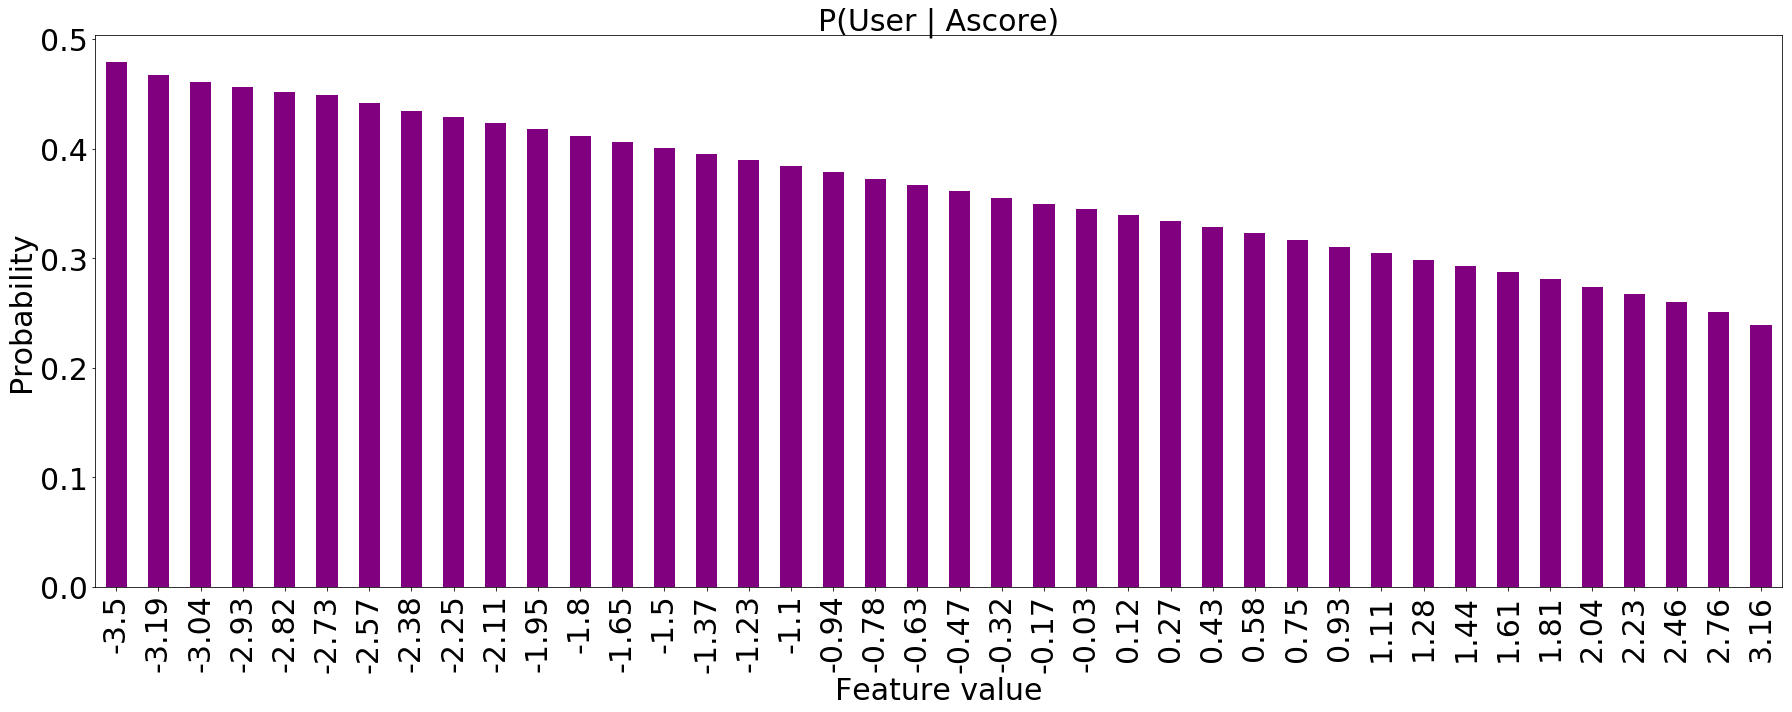

In [64]:
# Get the distribution of the Agreeableness vs the class Never Used
distribution = get_distribution(lr, X_train, y_train, 'Ascore', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Ascore', 'NonUser') 

# Get the distribution of the Agreeableness vs the class Never Used
distribution = get_distribution(lr, X_train, y_train, 'Ascore', 'User')

# Plot the distribution
plot_distribution(distribution, 'Ascore', 'User')



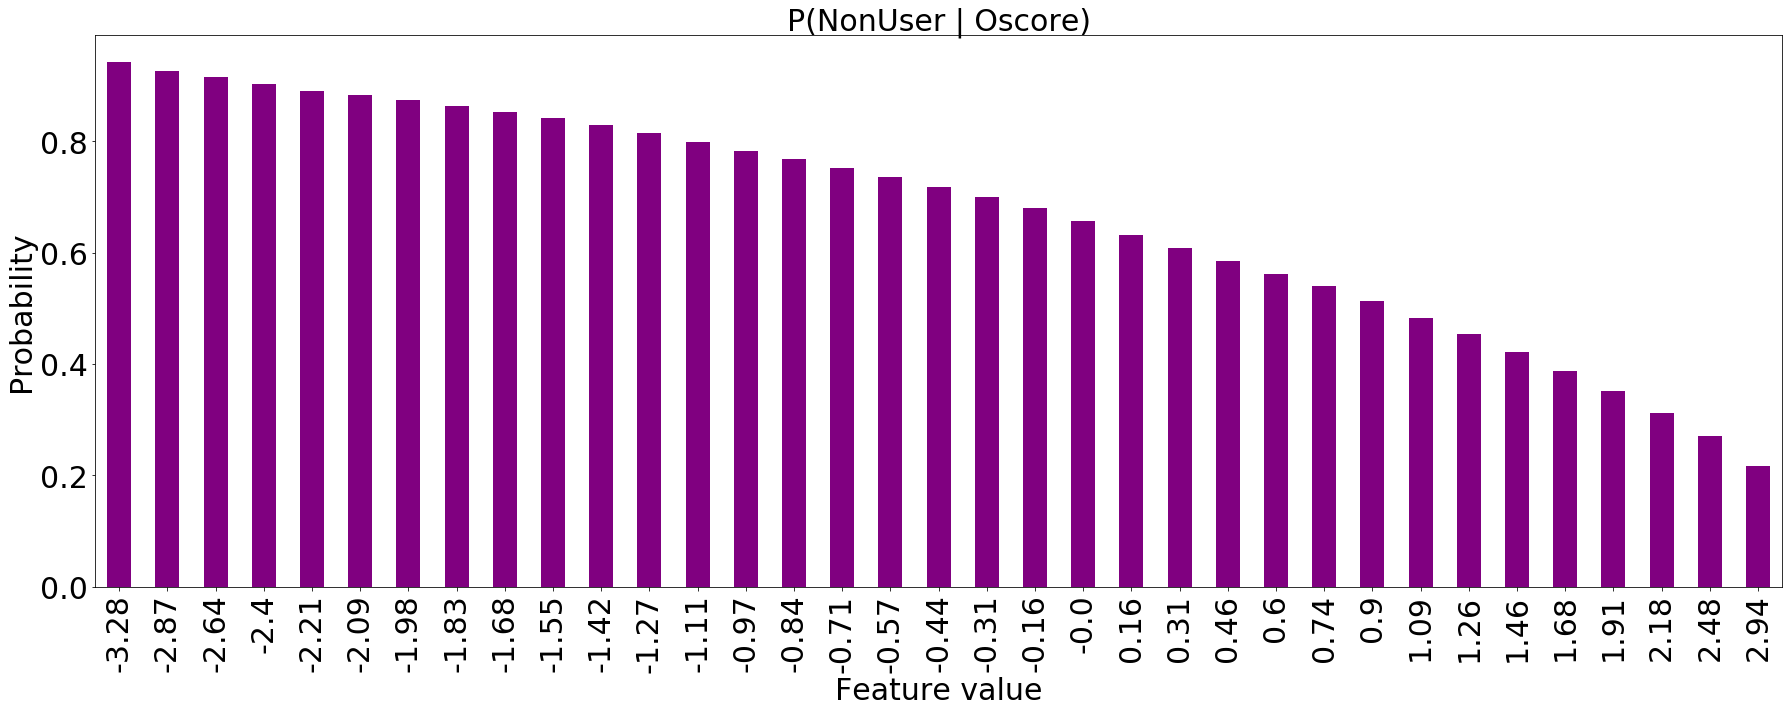

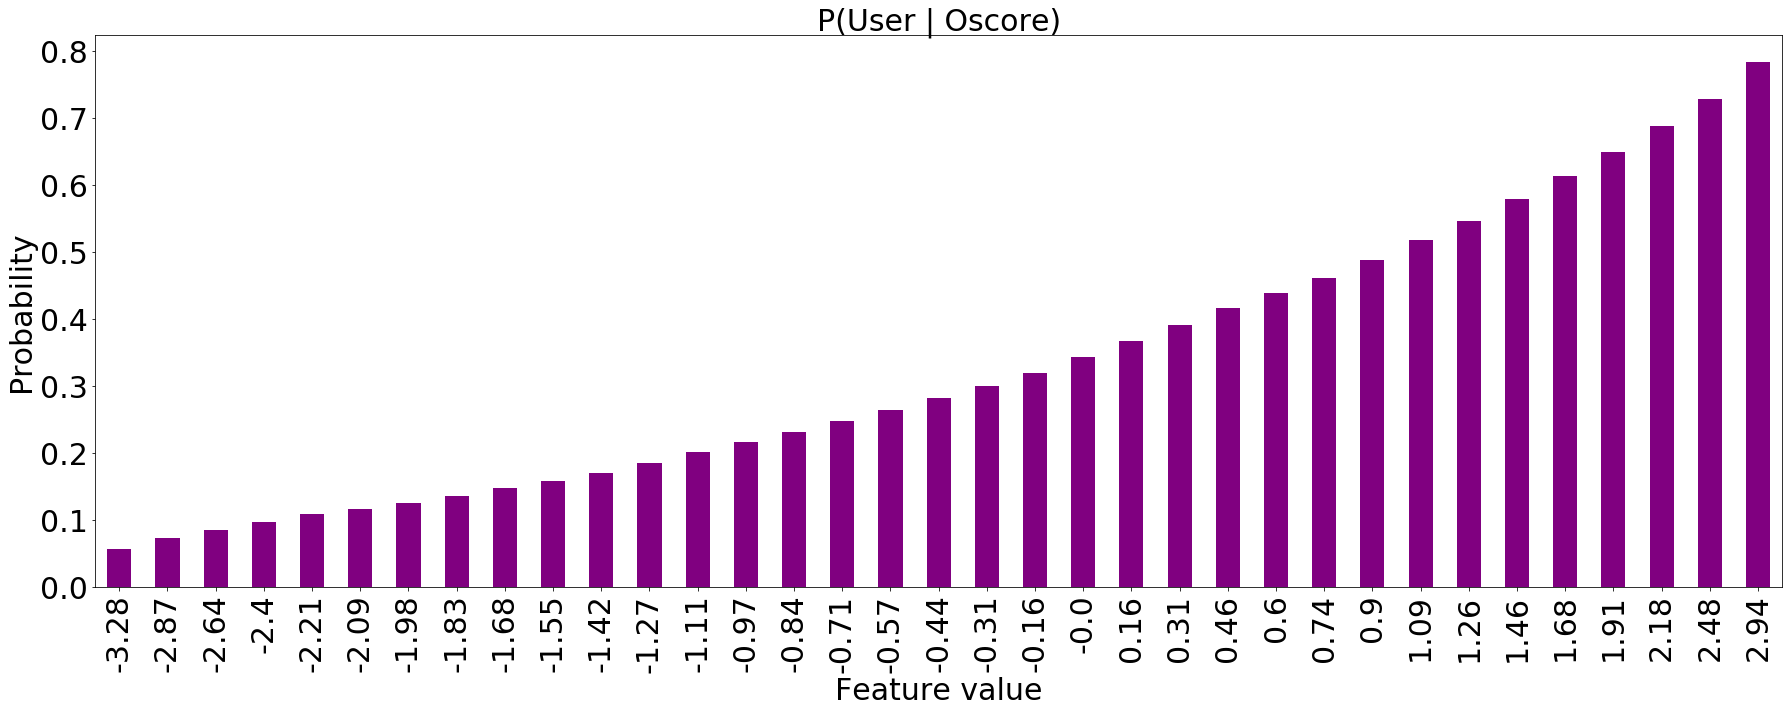

In [65]:
# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Oscore', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Oscore', 'NonUser')

# Get the distribution of the Agreeableness vs the class Never Used
distribution = get_distribution(lr, X_train, y_train, 'Oscore', 'User')

# Plot the distribution
plot_distribution(distribution, 'Oscore', 'User')

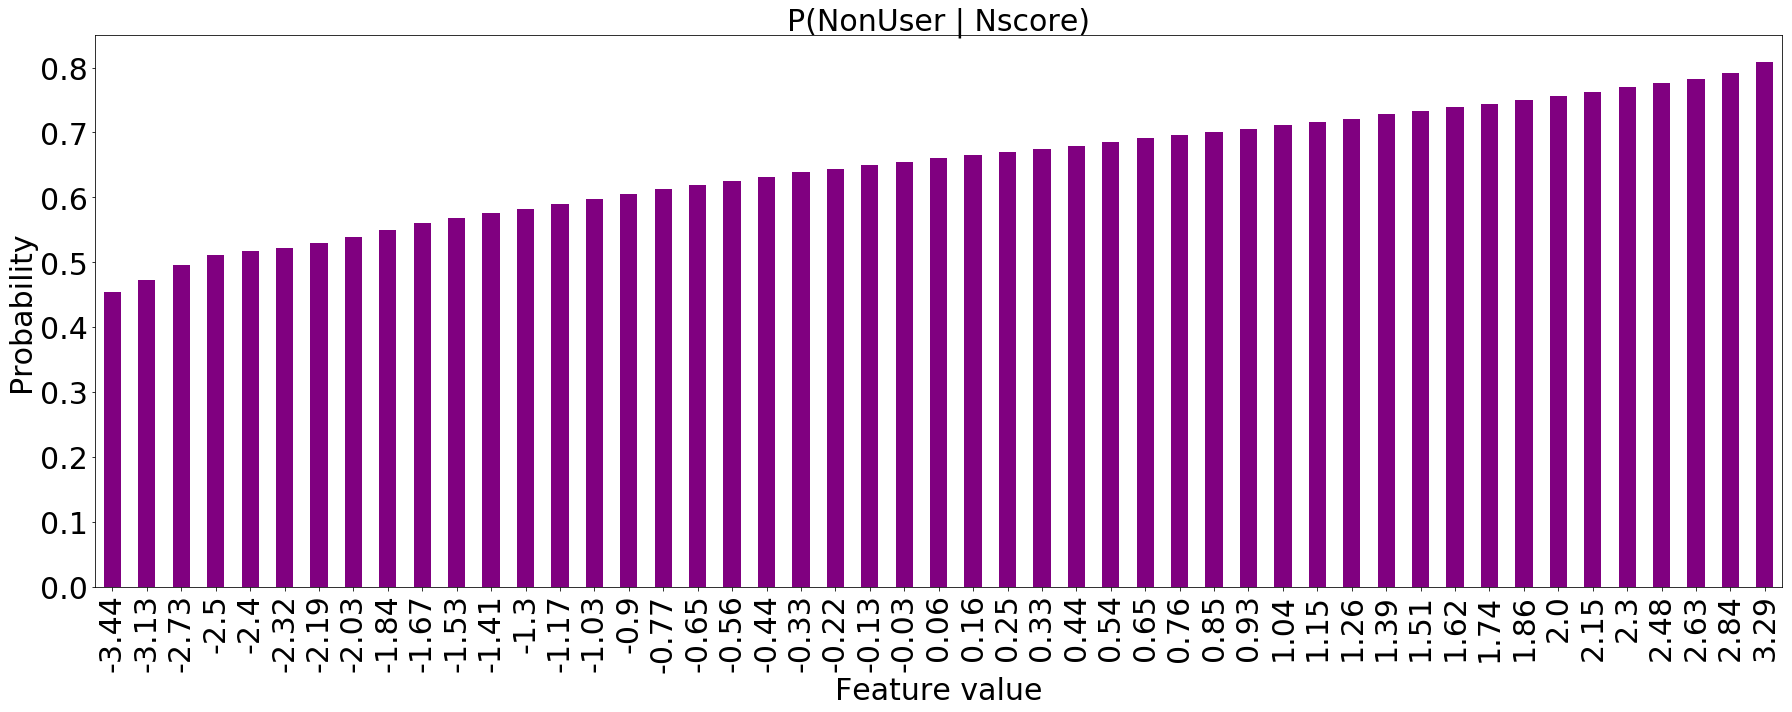

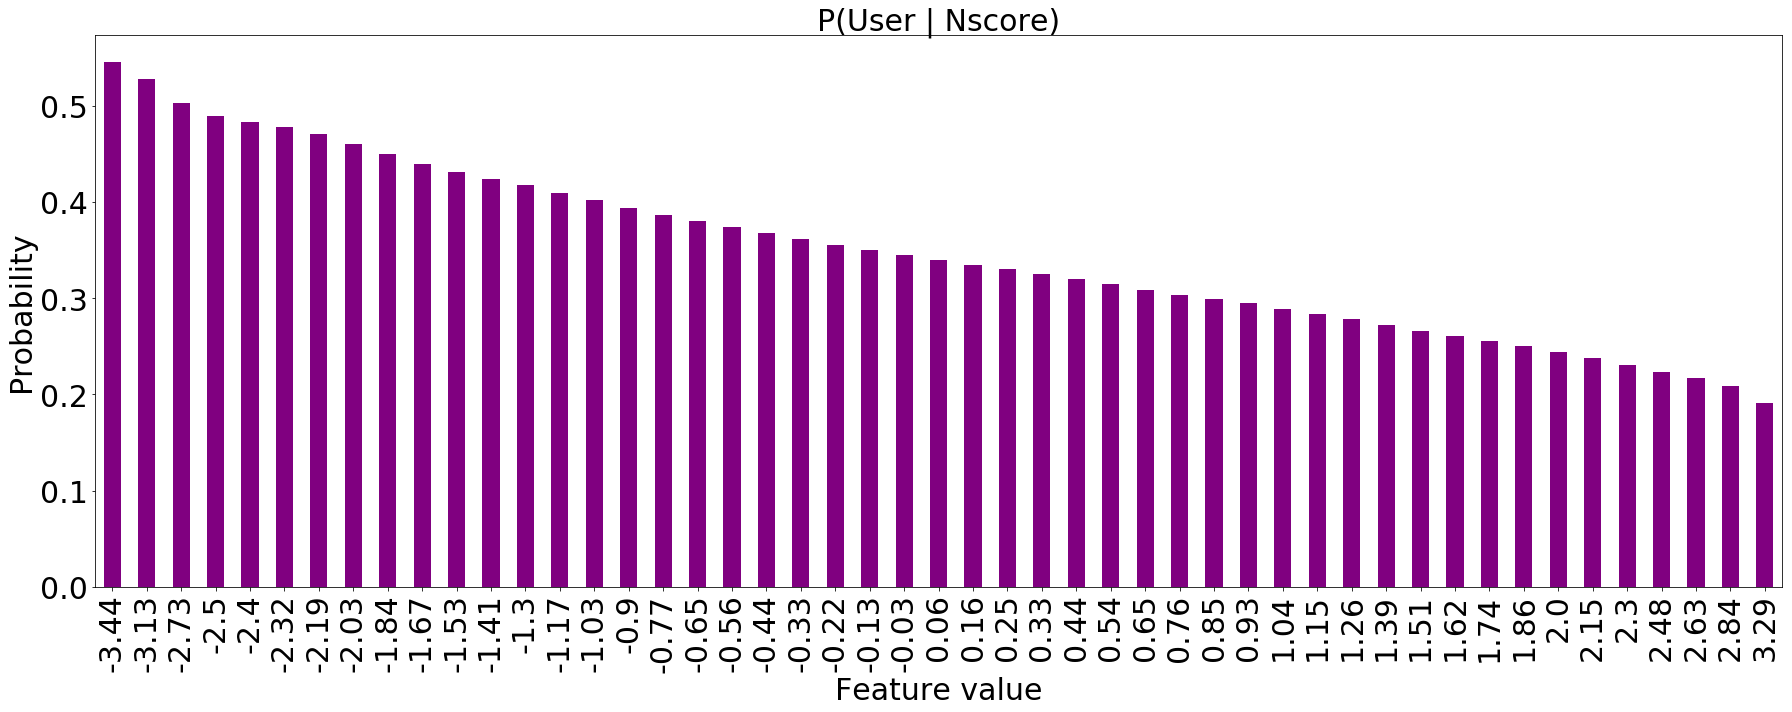

In [66]:
# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Nscore', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Nscore', 'NonUser')

# Get the distribution of the Agreeableness vs the class Never Used
distribution = get_distribution(lr, X_train, y_train, 'Nscore', 'User')

# Plot the distribution
plot_distribution(distribution, 'Nscore', 'User')

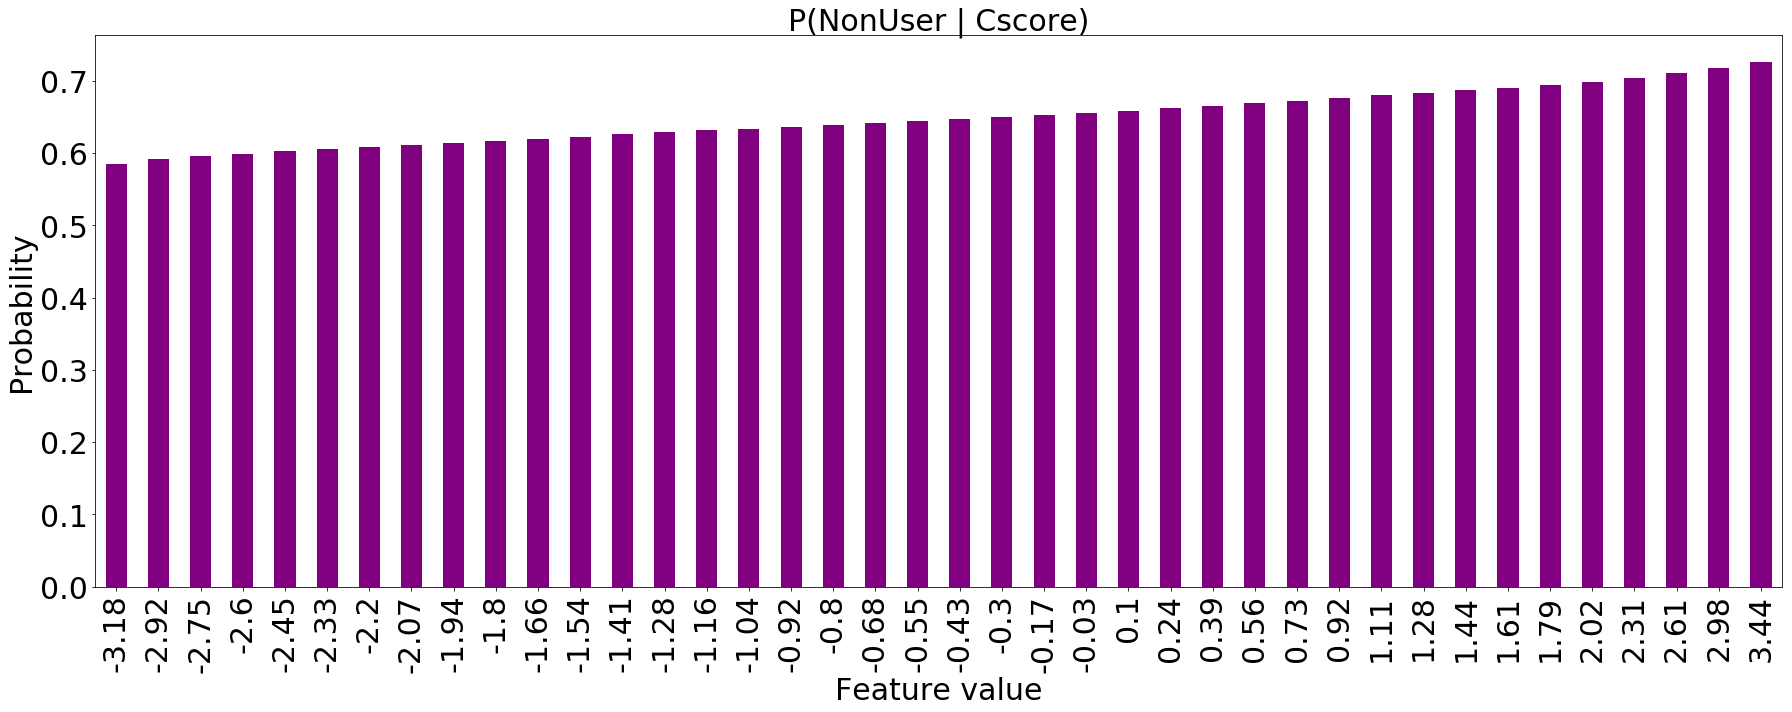

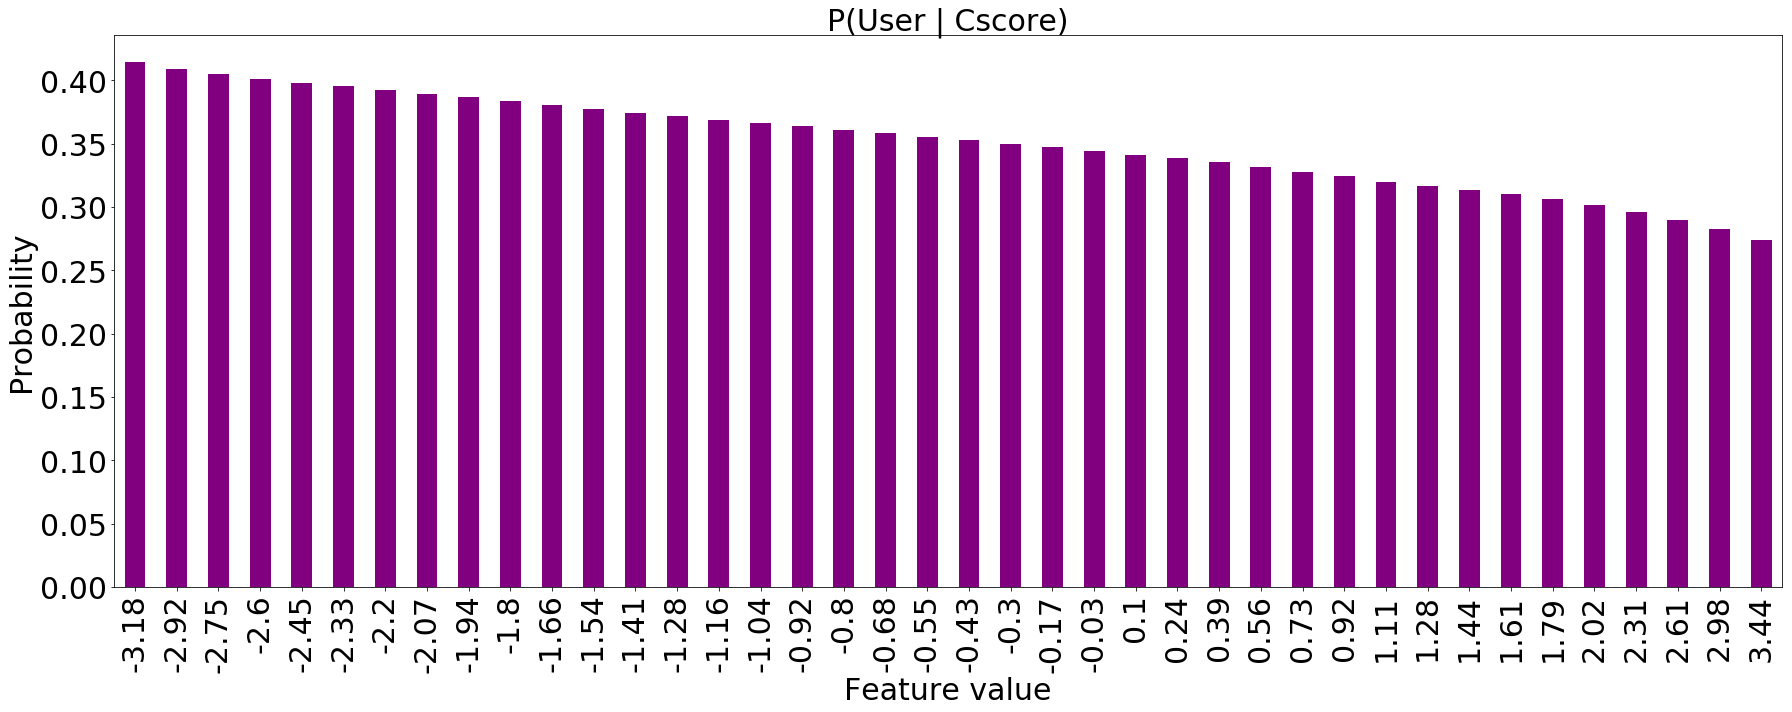

In [67]:
# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Cscore', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Cscore', 'NonUser')

# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Cscore', 'User')

# Plot the distribution
plot_distribution(distribution, 'Cscore', 'User')

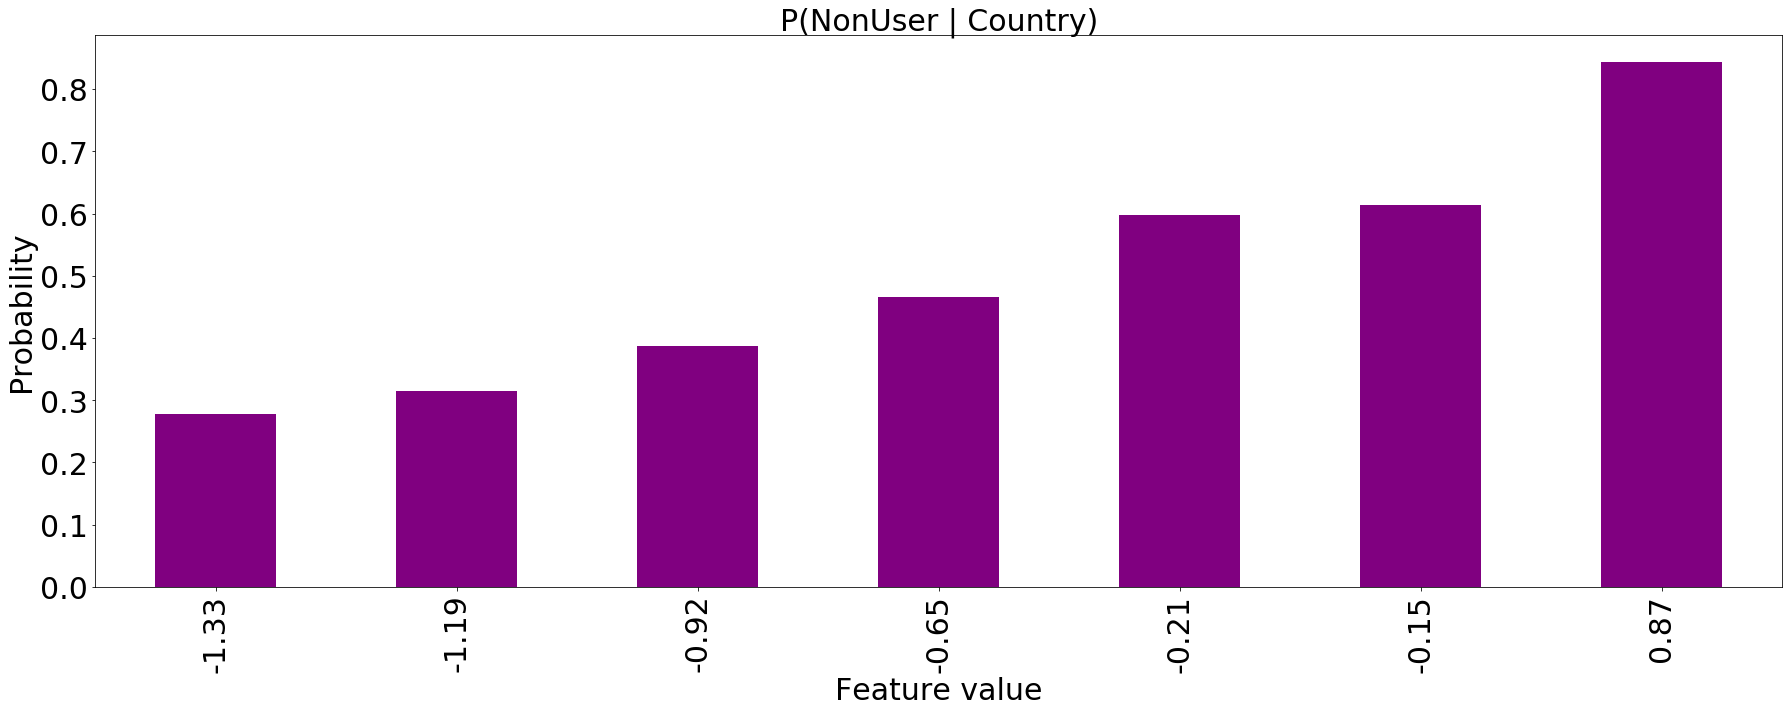

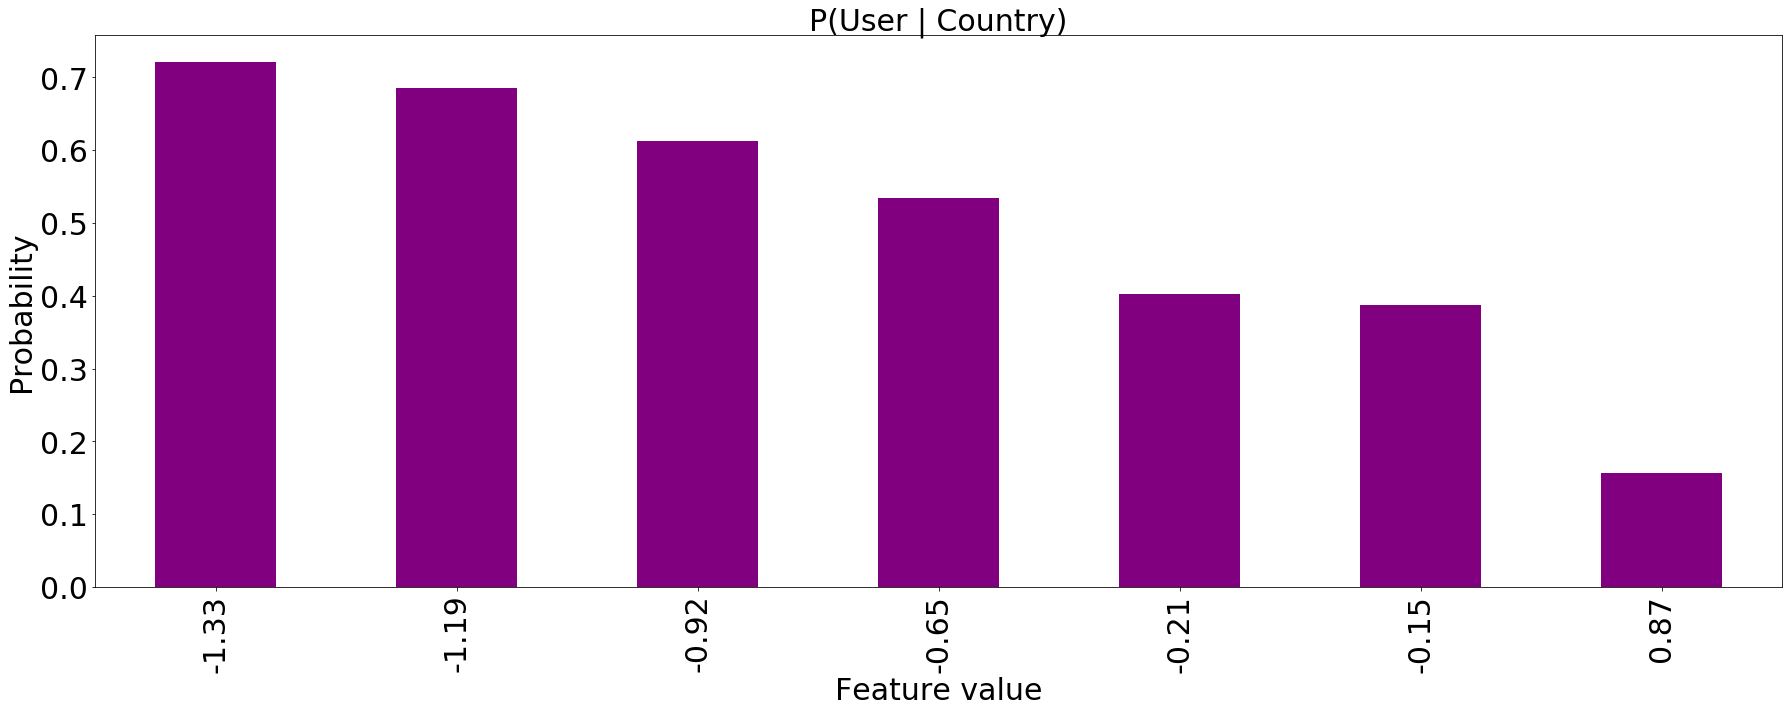

In [68]:
# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Country', 'NonUser')

# Plot the distribution
plot_distribution(distribution, 'Country', 'NonUser')

# Get the distribution
distribution = get_distribution(lr, X_train, y_train, 'Country', 'User')

# Plot the distribution
plot_distribution(distribution, 'Country', 'User')

In [69]:
#Declaring the model and predicting class labels
from sklearn import cross_validation
modelRandom = RandomForestClassifier(max_depth=3)
modelRandomCV= cross_validation.cross_val_score(modelRandom,X,y,cv=5)

In [70]:
modelRandomCV
rf_df = pd.DataFrame(modelRandomCV)

In [71]:
modelRandomCV.mean()

0.793103448275862

In [74]:
modelRandom.fit(X,y)
Test_df = pd.DataFrame(X_test)
Test_df.columns = ['Country', 'Nscore', 'Oscore', 'Ascore', 'Cscore',]
Test_df['LSDActual'] = pd.DataFrame(y_test)
Test_df['LSDPredicted']=pd.DataFrame(modelRandom.predict(X_test))

Test_df.head(50)


,Country,Nscore,Oscore,Ascore,Cscore,LSDActual,LSDPredicted
0,-1.331620,-0.444137,2.184065,0.750082,-0.299122,0,0
1,0.867687,-0.767960,0.743395,-0.937478,0.236279,0,0
2,0.867687,0.438591,0.310249,1.278230,-0.165872,0,0
3,0.867687,0.846989,0.157159,0.578566,0.915986,0,0
4,-1.331620,1.255428,0.743395,-1.952216,-0.428814,0,0
5,-1.331620,0.438591,1.460768,-0.318684,1.438211,0,1
6,0.867687,0.651304,1.264305,0.931717,-1.160611,0,0
7,-0.154584,1.624150,-0.707985,1.105205,-0.428814,0,0
8,0.867687,-0.654852,-0.440462,0.425796,-0.029802,0,0
9,-1.331620,0.756941,-1.270434,-0.471041,-0.428814,0,0


In [75]:
df.to_csv('nicotine.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C4C27B6630>],
      dtype=object)

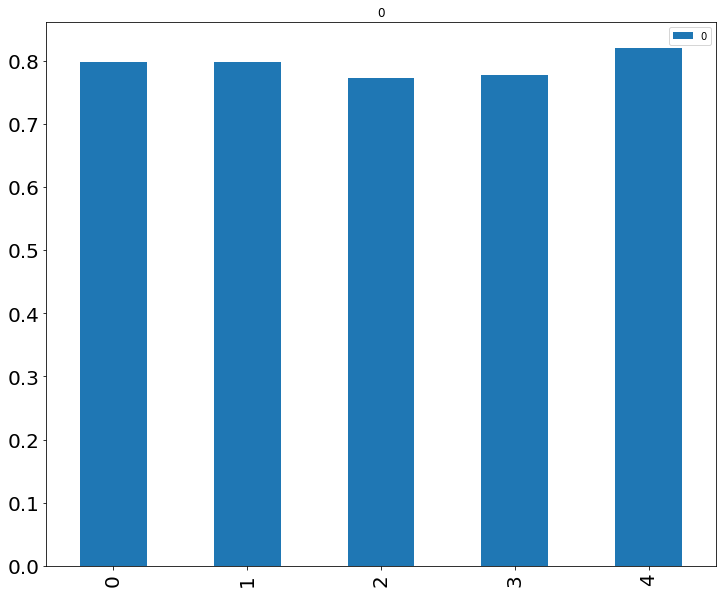

In [73]:
rf_df.plot.bar(subplots=True,fontsize=20,figsize=(12, 10))

In [59]:
print(Training model)
#train model
model.fit(features_matrix, labels)
predicted_labels = model.predict()
print "FINISHED classifying. accuracy score : "
print accuracy_score(test_labels, predicted_labels)

SyntaxError: invalid syntax (<ipython-input-59-bc18ecfa6ae3>, line 1)